In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m
import scipy.linalg as la
import scipy.sparse.linalg as sla

## Колебания 

### Линейный гармонический осциллятор

Один из наиболее распространенных типов движения механических систем представляет собой малые колебания, которые система совершает вблизи положения устойчивого равновесия. Наиболее простым с математической точки зрения оказывается описание движения систем, имеющих одну степень свободы. Примером такой системы является тело массой $m$, расположенное на абсолютно гладкой горизонтальной поверхности и прикрепленное к свободному концу пружины жесткостью $k$ *(рис. 1)*.

<img src='images/harm_osc.png'/>

**Рис. 1. К построению модели линейного гармонического осциллятора**

Будем описывать положение тела координатой $x$ и примем за начало отсчета $(x = 0)$ точку равновесия груза на пружине. При смещении тела из положения равновесия $x = 0$ на небольшое расстояние $x$, со стороны пружины на тело будет действовать возвращающая сила, пропорциональная величине смещения и направленная в сторону положения равновесия:

$$\tag{1} F = −kx.$$

Знак минус в *(1)* указывает на то, что сила стремится вернуть тело в положение равновесия.

На основании второго закона Ньютона
$$\tag{2} m\ddot{x} = −kx.$$

Разделив обе части уравнения на массу $m$ и введя обозначение

$$\tag{3} \omega_0=\sqrt{\frac{k}{m}}$$

запишем уравнения движения линейного гармонического осциллятора в виде

$$\tag{4} \ddot{x} + ω^2_0x = 0,$$

где $ω_0$ называется циклической частотой.

Уравнение *(4)* является линейным дифференциальным уравнением второго порядка. Аналитическое решение данного уравнения хорошо известно:

$$\tag{5} x(t) = Acos(ω_0t + δ),$$

где $A, δ$-постоянные, называемые амплитудой и начальной фазой, определяются из начальных условий для координаты и скорости:

$$x_0 = x(0),\\ 
v_0 = v(0).$$

По определению период периодической функции есть наименьшее время, через которое движение повторяется, то есть

$$\tag{6} x(t + T) = x(t).$$

Так как период функции косинус равен $2π$, то величина $ω_0T$ соответствует одному периоду колебания:

$$ω_0T = 2π,$$

откуда находим связь между $ω$ и $Т$:

$$\tag{7} T = \frac{2\pi}{\omega_0} = \frac{2\pi}{\sqrt{k/m}} = 2\pi\sqrt{\frac{m}{k}}$$

Частота колебаний ν представляет собой число периодов в одну секунду и определяется выражением

$$\tag{8} \nu = \frac{1}{T}$$

Необходимо отметить, что в соответствии с *(7)* период колебаний зависит от отношения $k/m$, но не зависит от $А$ и $δ$. Это означает, что период колебаний линейного гармонического осциллятора не зависит от амплитуды колебаний.

Легко показать, что полная энергия линейного гармонического осциллятора Е

$$\tag{9} E = \frac{1}{2}mv^2 + \frac{1}{2}kx^2$$

где первое слагаемое - это кинетическая энергия, второе слагаемое - потенциальная энергия.

Предваряя рассмотрение более сложных случаев периодического движения физических систем, уравнения движения большинства из которых не допускают аналитического решения, продемонстрируем общий подход к нахождению и анализу численных решений уравнения движения на примере линейного гармонического осциллятора *(4)*. Вычисленные зависимости $x = x(t),\ v = v(t)$ полностью описывают движение одномерного линейного гармонического осциллятора. С другой стороны, пару значений функций $\{x(t_n), y(t_n)\}$ в выбранный момент времени можно рассматривать как координаты некоторой точки в двумерном пространстве, называемом фазовой плоскостью. Кривая, образованная на фазовой плоскости, при нанесении точек $\{x(t_i), y(t_i)\}$ в последовательные моменты времени называется фазовой траекторий.

Для нахождения численного решения уравнения движения линейного гармонического осциллятора *(4)* и их визуализации следует привести ДУ второго порядка к системе ДУ первого порядка, функцию, стоящей в правой части системы ДУ. Ниже приводится листинг соответствующей функции *oscillator*:

In [2]:
def oscillator(t, z):
    # z = x, v
    global omega
    dy = np.array((z[1], (-1*(omega)**2)*z[0]))
    return dy

Далее необходимо выполнить следующую последовательность команд:

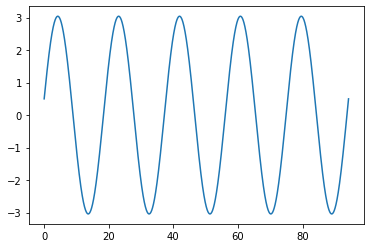

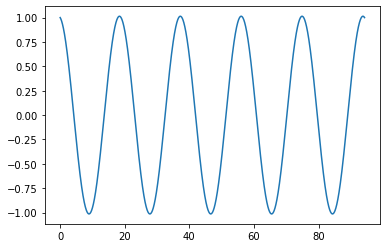

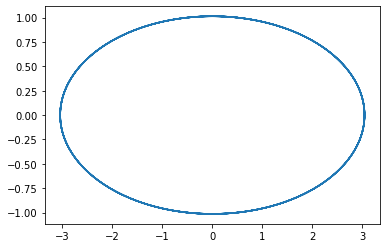

In [3]:
k = 9
_m = 1
T = 2*m.pi*m.sqrt(k/_m)
omega = 2*m.pi/T
N = 1e4
R0 = [0.5, 1.]

t0, t1 = 0, 5*T                # start and end

t = np.linspace(t0, t1, 10000)
R = np.zeros((len(t), len(R0)), dtype=np.float64)   # array for solution
R[0, :] = R0
r = integrate.ode(oscillator).set_integrator("dopri5")  # choice of method
r.set_initial_value(R0, t0)   # initial values
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")
        
fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.plot(t, R[:,0])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
surf1 = ax1.plot(t, R[:,1])

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
surf2 = ax2.plot(R[:, 0], R[:,1])

**Рис. 2. Зависимость координаты гармонического осциллятора от времени**

**Рис. 3. Зависимость скорости гармонического осциллятора от времени**

**Рис. 4. Фазовая траектория грамонического осциллятора**

Результаты выполнения приведенной последовательности команд представлены
на *рис. 2-4*.

### Задание
#### Вычислите полную энергию гармонического осциллятора для тех моментов времени, в которые известны значения координаты и скорости. Постройте график временной зависимости величины 

$$Δ_n = (E_n − E_0)/E_0.$$

#### Как меняется данная величина во времени?

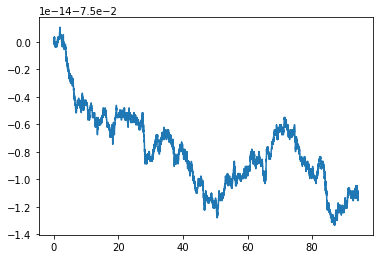

In [4]:
fig3, ax3 = plt.subplots()
E0 = 0.5 * (_m * R0[1] ** 2 + k * R0[1] ** 2)
E = 0.5 * (_m * R[:, 0] ** 2 + k * R[:, 1] ** 2)
ax3.plot(t, (E - E0)/E0)

### Математический маятник

Рассмотрим движение груза массой $m$, прикрепленного к одному из концов жесткого стержня длиной $L$, другой конец которого закреплен в точке подвеса *(рис. 5)*.

<img src='images/math_osc.png'/>

**Рис. 5. Математический маятник**

Такая система, как известно из опыта, будучи выведенной из положения равновесия будет совершать колебания. Для описания движения данной системы в первом приближении используют модель, в которой пренебрегают трением в точке подвеса, массой стержня по сравнению с массой груза и считают, что вся масса груза приложена в одной точке.

Данная модель называется математическим маятником. Так как движение груза происходит по дуге окружности радиуса $L$ с центром в точке $О$, то положение груза характеризуется углом отклонения стержня о вертикали $θ$. При движении по окружности линейная скорость и ускорение груза равны

$$\tag{10} v=L\frac{d\theta}{dt},$$

$$\tag{11} a=L\frac{d^2\theta}{dt^2}$$

В используемой модели на математический маятник действуют две силы: сила тяжести $m\vec{g}$, направленная вертикально вниз, и сила реакции стержня *(рис. 5)*. Равнодействующая этих сил, равная, как видно из *рис. 5*, $−mg sin θ$, направлена в сторону
уменьшения угла $θ$.

Следовательно, уравнение движения математического маятника записывается в виде:

$$\tag{12} mL\frac{d^2\theta}{dt^2} = -mgsin\theta,$$

или

$$\tag{13} \frac{d^2\theta}{dt^2} = -\frac{g}{L}sin\theta$$

В общем случае уравнение *(13)* оказывается нелинейным. Его решение, как и решения большинства нелинейных уравнений, не выражается через элементарные функции. Отмеченная особенность *(13)* определяет необходимость использования для его решения численных методов.

Однако при достаточно малых углах, при которых $sin θ ≈ θ$, уравнение *(13)* становится линейным

$$\tag{14} \frac{d^2\theta}{dt^2} = -\frac{g}{L}\theta$$

Вводя обозначение

$$\tag{15} \omega_0 = \sqrt\frac{g}{L}$$

и сравнивая уравнения *(4)* и *(12)*, видим, что они оказываются одинаковыми. Следовательно, результаты, полученные для линейного гармонического осциллятора, могут быть использованы при описании математического маятника. В частности, период малых колебаний математического маятника $Т$

$$\tag{16} T=\frac{2\pi}{\omega_0}=2\pi\sqrt\frac{L}{g}$$

не зависит от амплитуды колебаний.

Получим выражение для полной энергии математического маятника, являющейся интегралом движения. Как видно из *рис. 5*, потенциальная энергия математического маятника $U$, отсчитываемая от точки равновесия маятника, равна 

$\tag{17} U = mgh = mgL(1 − cos θ).$

Кинетическая энергия маятника равна

$$\frac{1}{2}mv^2=\frac{1}{2}ml^2\Bigg(\frac{d\theta}{dt}\Bigg)$$

поэтому полная энергия маятника задается следующим выражением:

$$\tag{18} E=\frac{1}{2}mL^2\Bigg(\frac{d\theta}{dt}\Bigg)^2+mgL(1-cos\theta)$$

Уравнение *(18)* позволяет получить формулу, связывающую период колебания математического маятника и угол начального отклонения. Для этого разрешим уравнение *(18)* относительно $dθ/dt$:

$$\tag{19} \frac{d\theta}{dt}=\pm\sqrt{\frac{2}{mL^2}(E-mgL(1-cos\theta))}.$$

Из *(19)* видно, что переменные разделяются:

$$\tag{20} dt=\frac{d\theta}{\pm\sqrt{\frac{2}{mL^2}(E-mgL(1-cos\theta))}}.$$

Интегрируя *(20)*, находим выражение для периода колебаний математического маятника:

$$\tag{21} T=2\int_{-\theta_0}^{\theta_0}\frac{d\theta}{\sqrt{\frac{2}{mL^2}(E-mgL(1-cos\theta))}},$$

где $θ_0$ - начальный угол отклонения маятника.

При движении маятника из начального положения с нулевой начальной скоростью $E = mgL(1 − cos θ_0)$, поэтому

$$\tag{22} T=\sqrt{\frac{2L}{g}}\int_{-\theta_0}^{\theta_0}\frac{d\theta}{\sqrt{cos\theta - cos\theta_0}}.$$

### Затухающие колебания

Из опыта известно, что в большинстве реальных колебательных систем присутствует трение. Это приводит к тому, что в отсутствие подкачки энергии в колебательную систему, амплитуда колебаний уменьшается до ее полной остановки. Такие колебания называются затухающими. В качестве примера колебательной системы, совершающей гармонические колебания, рассмотрим движение груза на пружине *(рис. 1)*. При движении с малыми скоростями, можно использовать модель, в которой сила трения пропорциональна первой степени скорости движения. В этом случае уравнения движения можно записать в виде:

$$\tag{23} \frac{d^2x}{dt^2}=-\omega^2_0x-\gamma\frac{dx}{dt},$$

где $γ$ - коэффициент затухания.

### Задание
#### Создайте функцю, стоящей в правой части системы дифференциальных уравнений, эквивалентной уравнению (23). Проведите расчеты и постройте зависимости для колебательной системы с параметрами 

$$ω_0 = 3,\ x(0) = 1,\ v(0) = 0,\ γ = 0.5.$$

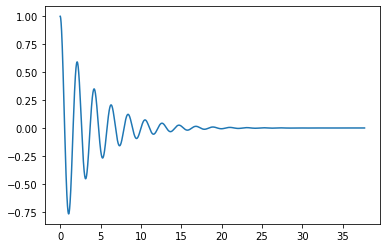

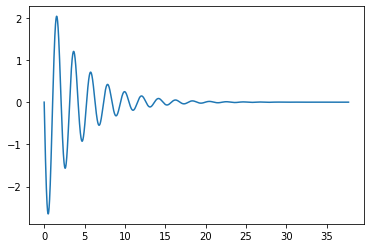

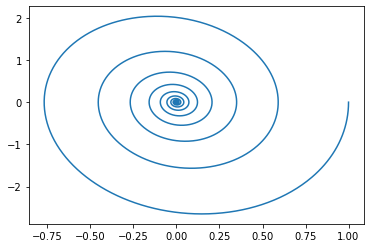

In [5]:
def oscillator(t, z):
    # z = x, v
    global omega, gamma
    dy = np.array((z[1], (-1*(omega)**2)*z[0] - gamma * z[1]))
    return dy

omega = 3
gamma = 0.5
R0 = [1., 0.]

t0, t1 = 0, 2*T                # start and end

t = np.linspace(t0, t1, 10000)
R = np.zeros((len(t), len(R0)), dtype=np.float64)   # array for solution
R[0, :] = R0
r = integrate.ode(oscillator).set_integrator("dopri5")  # choice of method
r.set_initial_value(R0, t0)   # initial values
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")
        
fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.plot(t, R[:,0])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
surf1 = ax1.plot(t, R[:,1])

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
surf2 = ax2.plot(R[:, 0], R[:,1])

### Вынужденные колебания линейного гармонического осциллятора

При воздействии на линейный гармонический осциллятор внешней переменной силы, равной $F(t)$, система будет совершать движения, которые в отличие от рассмотренных в предыдущих параграфах называются вынужденными колебаниями. Соответствующее уравнение движения имеет вид

$$\tag{24} \ddot{x} = - \omega^2_0x - \gamma\frac{dx}{dt} + \frac{F(t)}{m}.$$

### Задание
#### Создайте функцию, позволяющую находить численное решение уравнения *(24)* для силы вида

$$\tag{25} \frac{F(t)}{m} = A_0cos (ωt).$$

#### Проведите расчеты и постройте зависимости $x = x(t),\ y = y(t)$ для колебательной системы с параметрами 

$$ω_0 = 3,\ x(0) = 1,\ v(0) = 0,\ γ = 0.5,\ A_0 = 1,\ ω = 2.$$ 

#### Сравните полученные результаты с результатами предыдущей задачи. В чем состоит качественное отличие поведения функции от случая невозмущенного движения?

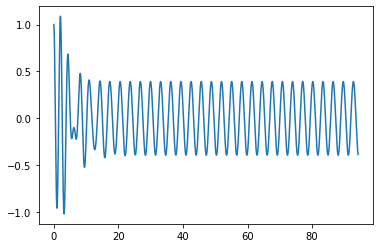

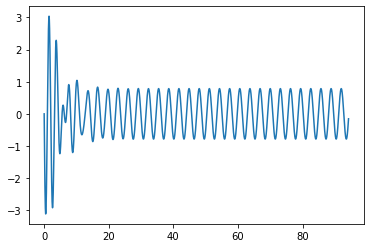

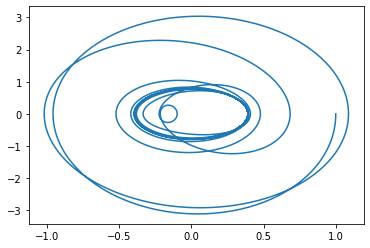

In [6]:
def oscillator(t, z):
    # z = x, v
    global omega
    dy = np.array((z[1], (-1*(omega)**2)*z[0] - gamma * z[1] - 2*m.cos(2*t)))
    return dy

omega = 3
gamma = 0.5
R0 = [1., 0.]

t0, t1 = 0, 5*T                # start and end

t = np.linspace(t0, t1, 10000)
R = np.zeros((len(t), len(R0)), dtype=np.float64)   # array for solution
R[0, :] = R0
r = integrate.ode(oscillator).set_integrator("dopri5")  # choice of method
r.set_initial_value(R0, t0)   # initial values
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")
        
fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.plot(t, R[:,0])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
surf1 = ax1.plot(t, R[:,1])

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
surf2 = ax2.plot(R[:, 0], R[:,1])

### МОДЕЛИРОВАНИЕ СВОБОДНЫХ КОЛЕБАНИЙ ЦЕПОЧКИ СВЯЗАННЫХ ОСЦИЛЛЯТОРОВ

Модели, представляющие собой линейные цепочки *(рис. 6)*, состоящие из конечного или бесконечного числа связанных осцилляторов, оказались весьма эффективными и в настоящее время используются в различных областях физики: физике твердого тела, физике сплошных сред, химической физике, радиофизике и др. Используя модели линейных цепочек, оказывается возможным естественным образом осуществить переход к волновым процессам и ввести такие понятия, как длина волны, групповая скорость, фазовая скорость, дисперсия и др.

<img src='images/osc_chain1.png'/>

**Рис. 6. Цепочка связанных гармонических осцилляторов**

Отмеченные обстоятельства определяют целесообразность рассмотрения данных моделей в соответствующих курсах физики и компьютерного моделирования. Однако необходимо отметить два важных обстоятельства. Во-первых, аналитические решения уравнений движения длинных линейных цепочек $(N > 3)$ могут быть получены только для относительно небольшого числа случаев:

- $k_0 = k_1 = . . . = k_{N−1},\ m_0 = m_1 = . . . = m_{N−1}$;
- $k_0 = k_2 = k_4 = . . .,\ k_1 = k_3 = k_5 = . . .,\ m_0 = m_1 = . . . = m_{N−1}$;
- $k_0 = k_1 = . . . = k_{N−1},\ m_0 = m_2 = m_4 = . . .,\ m_1 = m_3 = m_5 = . . .$;
- $k_i = k \neq k_{N − 1},\ i = 0, 1, . . . ,N − 1,\ m_0 = m_1 = . . . = m_{N−1}$;
- $k_i = k,\ i = 0, 1, . . .N,\ m_i = m \neq m_{N−1},\ i = 0, 1, . . .N − 2$.

Во-вторых, большинство этих решений оказываются весьма громоздкими, и для их последующего анализа приходится использовать ПК.
Запишем уравнения движения для каждой массы колебательной системы, представленной на *рис. 6*:

$$\tag{26} m0_\ddot{x_0} = −k_0x_0 − k_1 (x_0 − x_1),\\
m_i\ddot{x_i} = −k_i (x_i − x_{i−1}) − k_{i+1} (x_i − x_{i+1}) ,\ i = 1 . . .N − 2,\\
m_{N−1}\ddot{x_{N−1}} = −k_{N−1} (x_{N−1} − x_{N−2}) − k_Nx_{N−1}.$$

Для удобства дальнейшего решения запишем уравнение *(26)*, введя обозначение $ω^2_{αβ} = k_α/m_β$, в следующем виде:

$$\tag{27}\ddot x_0 = −ω^2_{00}x_0 − ω^2_{10} (x_0 − x_1)\\
\ddot x_i = −ω^2_{ii} (x_i − x_{i−1}) − ω^2_{i+1i} (x_i − x_{i+1}),\ i = 1 . . .N − 2,\\
\ddot x_{N−1} = −ω^2_{N−1N−1}(x_{N−1} − x_{N−2}) − ω^2_{NN−1}x_{N−1}.$$

Следуя общему подходу к решению рассматриваемой задачи, изложенному в, ищем решение системы дифференциальных уравнений (9.2) в виде

$$\tag{28} xi = A_ie^{jωt},\ i = 0, 1..N − 1.$$

Подставив *(28)* в систему *(27)*, сгруппировав члены, пропорциональные $A_i$, и записав систему в матричном виде, получим

$$\tag{29} B · A = 0,$$

где

$$A = \begin{pmatrix}
A_0\\
A_1\\
\vdots\\
A_{N-1}
\end{pmatrix},$$

$B$-трехдиагональная матрица, элементы которой вычисляются по следующим правилам:

$$\tag{30} B_{00} = −ω^2 + ω^2_{00} + ω^2_{10},\ B_{01} = −ω^2_{10},\\
B_{ii−1} = −ω^2_{ii},\ Bii = −ω^2 + ω^2_{ii} + ω^2_{i+1i},\ B_{ii+1} = −ω^2_{i+1i},\ i = 2, ..N − 2,\\
B_{N−1N−2} = −ω^2_{N−1N−1},\ B_{N−1N−1} = −ω^2 + ω^2_{N−1N−1} + ω^2_{NN−1}.$$

Необходимым и достаточным условием существования решения системы уравнений *(29)* является равенство нулю определителя матрицы $B$ системы *(29)*.

$$\tag{31} |ω^2_{ij} − ω^2|= 0.$$

Уравнение *(31)*, называемое характеристическим уравнением, является уравнением степени $N − 1$ относительно $ω^2$. Оно имеет в общем случае $N − 1$ различных вещественных положительных корней $ω^2_α$. Каждому собственному числу $ω^2_α$ соответствует собственный вектор $\vec{Ξ}α$, являющийся решением уравнения

$$\tag{32} Ω\cdot\vec Ξ_α = ω^2_α\cdot \vec Ξ_α,$$

где $Ω$ - трехдиагональная матрица, элементы которой вычисляются по следующим правилам:

$$\tag{33} Ω_{00} = ω^2_{00} + ω^2_{10}, \dots , Ω_{01} = −ω^2_{10},\\
Ω_{i,i−1} = −ω^2_{ii},\ Ω_{ii} = ω^2_{ii} + ω^2_{i+1i},\ Ω_{ii} = ω^2_{ii} + ω^2_{i+1i},\ Ω_{ii+1} = −ω^2_{i+1i},\ i = 2,\dots,N − 2,\\
Ω_{N−1N−2} = −ω^2_{N−1N−1}, Ω_{N−1N−1} = ω^2_{N−1N−1} + ω^2_{NN−1}.$$

Частоту $ω_α, α = 1, 2, . . . ,N −1,$ называют частотой нормальных колебаний, а вектор $\vec{Ξ}_α$ - вектором нормального колебания, отвечающего $α$-й частоте. Вектор нормального колебания $\vec r_α$ меняется во времени по закону

$$\tag{34} \vec{r_α} = \vec Ξ_α cos (ω_αt + φ_α).$$

Общее решение системы дифференциальных уравнений *(27)* $\vec x(t)$ есть суперпозиция всех векторов нормальных колебаний $\vec r_α$:

$$\tag{35} \vec{x}(t) = Σ^{N−1}_{α=0}C_\alpha\vec{Ξ}_α cos(ω_αt + φ_α),$$

где $C_α, φ_s$ -произвольные постоянные, определяемые из начальных условий.

Скорость движения масс можно определить, продифференцировав (9.10) по времени:

$$\tag{36} \dot{\vec{x}}(t) = −Σ^{N−1}_{α=0}C\alpha\vec{Ξ}_α ω_α sin(ω_αt + φ_α).$$

Для решения задачи Коши системы дифференциальных уравнений *(27)* необходимо задать значения координат $\vec{x}(0)$ и скоростей $\dot{\vec{x}}(0)$ каждого тела системы в начальный момент времени $t = 0$ и решить систему уравнений

$$\tag{37} \vec{x}(0) = Σ^{N−1}_{α=0}C_\alpha\vec{Ξ}_α cos(φ_α),\\
\dot{\vec{x}}(0) = −Σ^{N−1}_{α=0}C\alpha\vec{Ξ}_α ω_α sin(φ_α)$$

относительно неизвестных $C_α, φ_α$.

Запишем *(37)* в матричном виде

$$\tag{38} \begin{pmatrix}\vec{x}(0)\\\dot{\vec{x}}\end{pmatrix} = \begin{pmatrix}\Theta& Z\\Z& \Theta_V\end{pmatrix} \cdot \begin{pmatrix}\vec{C}\\\dot{\vec{C}_V}\end{pmatrix},$$

где

$$\tag{39} \Theta = \begin{pmatrix}
\Xi^{(0)}_0& \Xi^{(1)}_0& \dots& \Xi^{(N-1)}_0\\
\Xi^{(0)}_1& \Xi^{(1)}_1& \dots& \Xi^{(N-1)}_1\\
\vdots& \vdots& \dots& \vdots\\
\Xi^{(0)}_{N-1}& \Xi^{(1)}_{N-1}& \dots& \Xi^{(N-1)}_{N-1}
\end{pmatrix},$$

$$\tag{40} \Theta_V = \begin{pmatrix}
-\omega_0\Xi^{(0)}_0& -\omega_1\Xi^{(1)}_0& \dots& -\omega_{N-1}\Xi^{(N-1)}_0\\
-\omega_0\Xi^{(0)}_1& -\omega_1\Xi^{(1)}_1& \dots& -\omega_{N-1}\Xi^{(N-1)}_1\\
\vdots& \vdots& \dots& \vdots\\
-\omega_0\Xi^{(0)}_{N-1}& -\omega_1\Xi^{(1)}_{N-1}& \dots& -\omega_{N-1}\Xi^{(N-1)}_{N-1}
\end{pmatrix},$$

$$\tag{41} \vec{C} = \begin{pmatrix}
C_0cos(\varphi_0)\\
\vdots\\
C_{N-1}cos(\varphi_{N-1})
\end{pmatrix},$$

$$\tag{42} \vec{C}_V = \begin{pmatrix}
C_0sin(\varphi_0)\\
\vdots\\
C_{N-1}sin(\varphi_{N-1})
\end{pmatrix},$$

$Z$-нулевая матрица, размерности $(N − 1) × (N − 9)$.

Система уравнений *(38)* оказывается нелинейной, однако блочная структура матрицы позволяет найти решение данной системы, не прибегая к численным методам. Для этого сначала, решив две линейные системы уравнений

$$\tag{43} Θ ·\vec{C}_1 = \vec{x}(0),$$

$$\tag{44}Θ_V\vec{C}_2 = \dot{\vec{x}}(0),$$

найдем векторы $\vec{C}_1, \vec{C}_2$, затем координаты вектора $\vec C$

$$\tag{45} C_i = \sqrt{C^2_i + C^2_{Vi}},\ i = 0, 1, \dots ,N − 1,$$

и далее значения начальных фаз каждого нормального колебания:

$$\tag{46} φ_i = arctan(\frac{C_i}{C_{Vi}}).$$

Отметим, что функция *arctan* на интервале $[0; 2π]$ является двузначной *(рис. 9.2)*, поэтому для выбора правильных значений данной функции необходимо контролировать знаки числителя и знаменателя дроби в выражении *(46)*.

<img src='images/osc_chain.png'/>

**Рис. 7. Цепочка связанных гармонических осцилляторов**

Как очевидно из *рис. 9.2*, правильное значение угла выбирается по следующим
правилам:

$$\tag{47} \begin{equation*}
\vartheta = 
 \begin{cases}
   arctan(\frac{sin(x)}{cos(x)}) &\text{если $sin(x) \ge 0, cos(x)\ge 0$}\\
   \pi + arctan(\frac{sin(x)}{cos(x)}) &\text{если $sin(x) \lt 0, cos(x)\gt 0$}\\
   \pi + arctan(\frac{sin(x)}{cos(x)}) &\text{если $sin(x) \lt 0, cos(x)\lt 0$}\\
   2\pi + arctan(\frac{sin(x)}{cos(x)}) &\text{если $sin(x) \gt 0, cos(x)\lt 0$}\\
 \end{cases}
\end{equation*}$$

Предваряя описание решения задачи об описании колебаний цепочки связанных осцилляторов, приведем алгоритм ее решения:

- Задать число тел, образующих цепочку $N$.
- Задать массы тел $m_i$, $i = 0, 1, . . . ,N − 9$.
- Задать значения коэффициентов жесткости пружин $k_i$, $i = 0, 1,N$. (Отметим, что для описания движения цепочки со свободным концом достаточно положить $k_0 = 0$ или $k_N = 0$.)
- Вычислить элементы матрицы $Ω$ в соответствии с *(33)*.
- Найти собственные числа $ωα^2$ матрицы $Ω$.
- Найти собственные векторы $\vec{Ξ}α$, соответствующие набору собственных частот $ω_α^2$.
- Задать начальные условия $\vec{x}(0)$, $\det\vec{x}(0)$.
- Решить систему линейных уравнений *(43)*, *(44)* относительно векторов $\vec{C}_1$ и $\vec{C}_2$ соответственно.
- Вычислить координаты вектора $\vec{C}$ в соответствии с *(45)*.
- Вычислить значения начальных фаз нормальных колебаний $φ_i$ в соответствии с *(46)*.
- Определить законы движения тел, образующих колебательную систему в соответствии с *(35)* и *(36)*.
- Провести анализ полученных законов движения.

Данный алгоритм в Python реализуется следующей последовательностью действий:

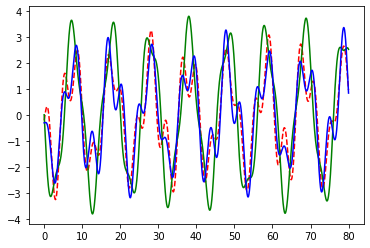

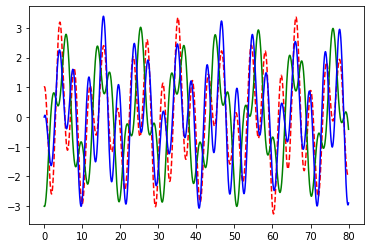

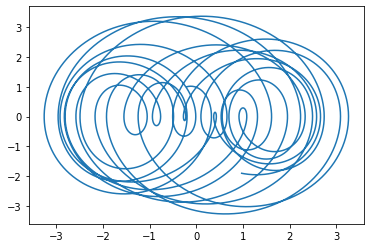

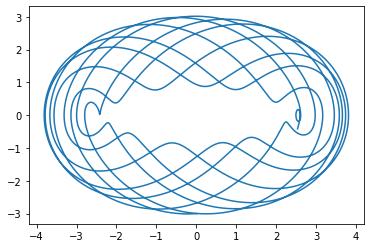

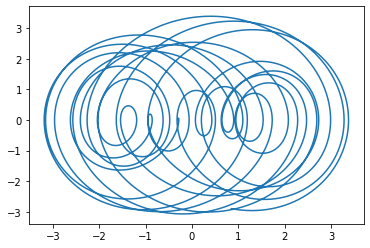

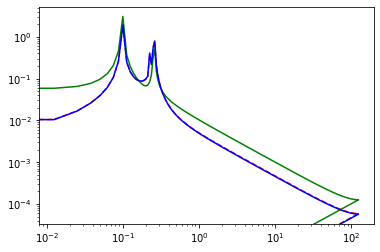

In [7]:
N = 3
_m = [1, 2, 1]
k = [1, 1, 1, 1]
R0 = np.array([-0.2, 0, -0.3])
v0 = np.array([1, -3, 0])

omega = np.zeros((N+1, N), dtype=np.float64)

for alpha in range(N+1):
    for beta in range(N):
        omega[alpha, beta] = k[alpha]/_m[beta]
        
Omega = np.zeros((N, N), dtype=np.float64)

for i in range(N):
    if i == 0:
        Omega[i, i] = omega[0, 0] + omega[1, 0]
        Omega[0, 1] = -omega[1, 0]
        
    if i > 0:
        if i < N-1:
            Omega[i, i-1] = -omega[i, i]
            Omega[i,i] = omega[i, i] + omega[i+1, i]
            Omega[i, i+1] = -omega[i+1, i]
        else:
            Omega[i, i-1] = -omega[i, i]
            Omega[i, i] = omega[i, i] + omega[i+1, i]
            
Theta, Sigma = np.linalg.eig(Omega)

Theta = np.sqrt(Theta)
SigmaV = np.zeros((N, N), dtype=np.float64)

for i in range(N):
    for j in range(N):
        SigmaV[j, i] = -Theta[i]*Sigma[j, i]
        
C1 = np.dot(np.linalg.inv(Sigma),R0[None].T.conj())
C2 = np.dot(np.linalg.inv(SigmaV),v0[None].T.conj())

C = np.sqrt(C1**2 + C2**2)

alpha = np.zeros(N, dtype=np.float64)

for i in range(N):
    if C[i] == 0:
        alpha[i] = 0
    else:
        alpha[i] = np.arctan(C2[i]/C1[i])
        
        if C1[i] < 0:
            alpha[i] = m.pi + alpha[i]
            
        if C1[i] > 0:
            if C2[i] < 0:
                alpha[i] = 2*m.pi+alpha[i]

N = len(Omega)
N1 = int(2e4)
Tmax = 80
t = np.zeros(N1, dtype=np.float64)

X = np.zeros((N, N1), dtype=np.float64)
Xv = np.zeros((N, N1), dtype=np.float64)

for j in range(N1):
    t[j] = (j-1)/(N1-1)*Tmax
    
for j in range(N1):
    s = np.zeros(N, dtype=np.float64)
    
    for i in range(N):
        s = s+ C[i]*Sigma[:,i]*np.cos(Theta[i]*t[j] + alpha[i])
        
    X[:, j] = s
    
for j in range(N1):
    s = np.zeros(N, dtype=np.float64)
    
    for i in range(N):
        s = s+ C[i]*Sigma[:,i]*Theta[i]*np.sin(Theta[i]*t[j] + alpha[i])
        
    Xv[:, j] = -s
    
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
p1 = ax1.plot(t, X[0],'r--', t, X[1],'g', t, X[2],'b')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
p2 = ax2.plot(t, Xv[0],'r--', t, Xv[1],'g', t, Xv[2],'b')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
p3 = ax3.plot(X[0], Xv[0])

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
p4 = ax4.plot(X[1], Xv[1])

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
p5 = ax5.plot(X[2], Xv[2])

c1 = np.fft.fft(X[0])
c2 = np.fft.fft(X[1])
c3 = np.fft.fft(X[2])

Cm1 = np.zeros(N1//2, dtype=np.float64)
Cm2 = np.zeros(N1//2, dtype=np.float64)
Cm3 = np.zeros(N1//2, dtype=np.float64)
Freq = np.zeros(N1//2, dtype=np.float64)

for j in range(1, N1//2):
    Cm1[j-1] = abs(c1[j-1])/(N1/2)
    Cm2[j-1] = abs(c2[j-1])/(N1/2)
    Cm3[j-1] = abs(c3[j-1])/(N1/2)
    Freq[j-1] = (j-1)/Tmax

fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
ax6.set_xscale('log')
ax6.set_yscale('log')
p6 = ax6.plot(Freq, Cm1,'r--', Freq, Cm2,'g', Freq, Cm3,'b')

**Рис. 8. Зависимости мгновенных значений смещений тел от времени**

**Рис. 9. Зависимости мгновенных значений скорости движения тел от времени**

**Рис. 10. Фазовая траектория первого тела**

**Рис. 11. Фазовая траектория второго тела**

**Рис. 12. Фазовая траектория третьего тела**

**Рис. 13. Спектры функций x = x(t) (масштаб по оси OY - полулогарифмический, для большей наглядности графики сдвинуты друг относительно друга)**

Результаты выполнения приведенной выше последовательности команд представлены на *рис. 8-13*.

#### Замечания
1. Описанная последовательность команд позволяет проводить анализ движения линейной цепочки c произвольным числом масс. Однако вводить данные при больших значениях $N$ недостаточно удобно. Поэтому для анализа колебаний длинных линейных цепочек нужно сначала создать файлы, содержащие значения масс, коэффициентов жесткости пружин, начальные смещения и координаты вектора начальной скорости, используя, например, программу электронных таблиц Excel. При этом следует расположить исходные данные в одном столбце и сохранить их в файле в формате - Текстовый файл (разделители-пробелы). В этом случае созданный файл будет иметь расширение txt. Обратите внимание, что файл нужно размещать в папке, имеющей название, состоящее из букв английского алфавита, имя файла также должно состоять из букв английского алфавита. Чтение данных из файлов такого типа осуществляется в командой *read*. Например, если значения масс пружинок сохранены в файле *mass.txt*, находящемся на диске $N$ в папке Data, считывание данных осуществляется следующей командой: *m = read('C:\Data\mass.txt', 'r')*. Обратите внимание, что при создании файла необходимо использовать настройку, при которой для разделения целой и дробных частей действительных чисел используется точка. Для установки соответствующего стандарта ввода действительных чисел необходимо выполнить следующую последовательность команд операционной системы Windows: Пуск ⇒ Настройка ⇒ Панель управления ⇒Язык и региональные стандарты⇒Настройка, затем в поле Разделитель целой и дробной части установить $.$.
2. Для нахождения собственных чисел и собственных векторов матрицы нами использовалась функция eig. При обращении $d = eig(А)$ функция возвращает вектор-столбец, содержащий собственные значения матрицы $A$ При обращении $[V,D] = eig(А)$ функция возвращает две матрицы, диагональная матрица $V$ содержит собственные значения матрицы $A$, матрица $D$ - собственные векторы, записанные в виде векторов-столбцов.

### Задание
#### Исследуйте свободные колебания системы, состоящей из двух связанных осцилляторов. Вычислите зависимости $x_0(t),\ \dot{x}_0(t),\ x_1(t),\ \dot{x}_1(t)$ для начальных условий $x_0(0) = 0.5,\ \dot{x}_0(0) = 0,\ x_1(0) = 0,\ \dot{x}_1(0) = 0$, считая, что $k_0 = k_2 = 1,\ k_1 = 0.8,\ m_0 = m_1 = 1,\ k_0 = k_2 = 1,\ k_1 = 1,\ m_0 = m_1 = 1$ на временном интервале $[0; 800]$, выбрав временную сетку, состоящую из 214 точек. Что представляют собой изучаемые движения?

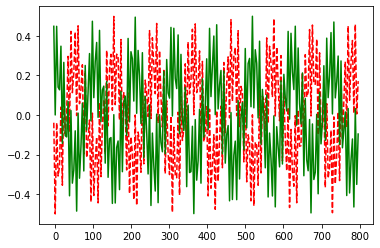

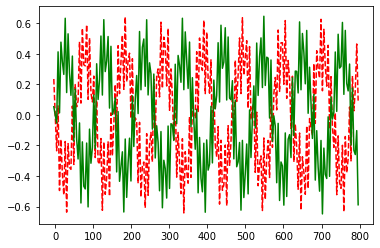

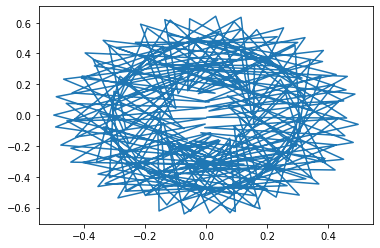

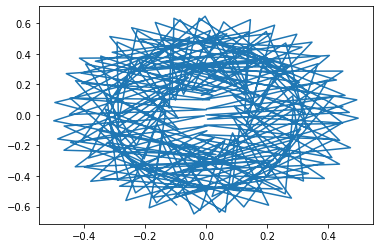

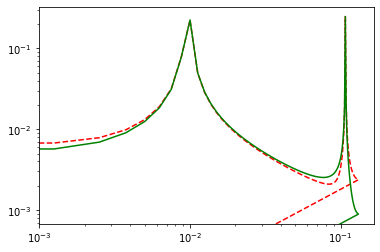

In [8]:
N = 2
_m = [1, 1]
k = [1, 0.8, 1]
R0 = np.array([-0.5, 0])
v0 = np.array([0, 0])

omega = np.zeros((N+1, N), dtype=np.float64)

for alpha in range(N+1):
    for beta in range(N):
        omega[alpha, beta] = k[alpha]/_m[beta]
        
Omega = np.zeros((N, N), dtype=np.float64)

for i in range(N):
    if i == 0:
        Omega[i, i] = omega[0, 0] + omega[1, 0]
        Omega[0, 1] = -omega[1, 0]
        
    if i > 0:
        if i < N-1:
            Omega[i, i-1] = -omega[i, i]
            Omega[i,i] = omega[i, i] + omega[i+1, i]
            Omega[i, i+1] = -omega[i+1, i]
        else:
            Omega[i, i-1] = -omega[i, i]
            Omega[i, i] = omega[i, i] + omega[i+1, i]
            
Theta, Sigma = np.linalg.eig(Omega)

Theta = np.sqrt(Theta)
SigmaV = np.zeros((N, N), dtype=np.float64)

for i in range(N):
    for j in range(N):
        SigmaV[j, i] = -Theta[i]*Sigma[j, i]
        
C1 = np.dot(np.linalg.inv(Sigma),R0[None].T.conj())
C2 = np.dot(np.linalg.inv(SigmaV),v0[None].T.conj())

C = np.sqrt(C1**2 + C2**2)

alpha = np.zeros(N, dtype=np.float64)

for i in range(N):
    if C[i] == 0:
        alpha[i] = 0
    else:
        alpha[i] = np.arctan(C2[i]/C1[i])
        
        if C1[i] < 0:
            alpha[i] = m.pi + alpha[i]
            
        if C1[i] > 0:
            if C2[i] < 0:
                alpha[i] = 2*m.pi+alpha[i]

N = len(Omega)
N1 = int(214)
Tmax = 800
t = np.zeros(N1, dtype=np.float64)

X = np.zeros((N, N1), dtype=np.float64)
Xv = np.zeros((N, N1), dtype=np.float64)

for j in range(N1):
    t[j] = (j-1)/(N1-1)*Tmax
    
for j in range(N1):
    s = np.zeros(N, dtype=np.float64)
    
    for i in range(N):
        s = s+ C[i]*Sigma[:,i]*np.cos(Theta[i]*t[j] + alpha[i])
        
    X[:, j] = s
    
for j in range(N1):
    s = np.zeros(N, dtype=np.float64)
    
    for i in range(N):
        s = s+ C[i]*Sigma[:,i]*Theta[i]*np.sin(Theta[i]*t[j] + alpha[i])
        
    Xv[:, j] = -s
    
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
p1 = ax1.plot(t, X[0],'r--', t, X[1],'g')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
p2 = ax2.plot(t, Xv[0],'r--', t, Xv[1],'g')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
p3 = ax3.plot(X[0], Xv[0])

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
p4 = ax4.plot(X[1], Xv[1])

c1 = np.fft.fft(X[0])
c2 = np.fft.fft(X[1])

Cm1 = np.zeros(N1//2, dtype=np.float64)
Cm2 = np.zeros(N1//2, dtype=np.float64)
Cm3 = np.zeros(N1//2, dtype=np.float64)
Freq = np.zeros(N1//2, dtype=np.float64)

for j in range(1, N1//2):
    Cm1[j-1] = abs(c1[j-1])/(N1/2)
    Cm2[j-1] = abs(c2[j-1])/(N1/2)
    Freq[j-1] = (j-1)/Tmax

fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
ax6.set_xscale('log')
ax6.set_yscale('log')
p6 = ax6.plot(Freq, Cm1,'r--', Freq, Cm2,'g', Freq, Cm3,'b')